In [19]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:aTSA’:

    forecast




In [47]:
library(aTSA)
library(hexView)
library(urca)

In [38]:
data(UKpppuip)

In [44]:
x <- UKconinc$incl #The log of real disposable income in the U.K.

The Augmented Dickey-Fuller test incorporates three types of linear regression models. The first type (type1) is a linear model with no drift and linear trend with respect to time: $$dx[t] = \rho*x[t-1] + \beta[1]*dx[t-1] + ... + \beta[nlag - 1]*dx[t - nlag + 1] +e[t],$$ where $d$ is an operator of first order difference, i.e., $dx[t] = x[t] - x[t-1]$, and $e[t]$ is an error term.

The second type (type2) is a linear model with drift but no linear trend: $$dx[t] = \mu + \rho*x[t-1] + \beta[1]*dx[t-1] + ... + \beta[nlag - 1]*dx[t - nlag + 1] +e[t].$$

The third type (type3) is a linear model with both drift and linear trend: $$dx[t] = \mu + \beta*t + \rho*x[t-1] + \beta[1]*dx[t-1] + ... + \beta[nlag - 1]*dx[t - nlag + 1] +e[t].$$

We use the default nlag = floor(4*(length(x)/100)^(2/9)) to calcuate the test statistic. 

The Augmented Dickey-Fuller test statistic is defined as $$ADF = \rho.hat/S.E(\rho.hat),$$ where $\rho.hat$ is the coefficient estimation and $S.E(\rho.hat)$ is its corresponding estimation of standard error for each type of linear model. The p.value is calculated by interpolating the test statistics from the corresponding critical values tables (see Table 10.A.2 in Fuller (1996)) for each type of linear models with given sample size $n$ = length(x). The Dickey-Fuller test is a special case of Augmented Dickey-Fuller test when nlag = 2.

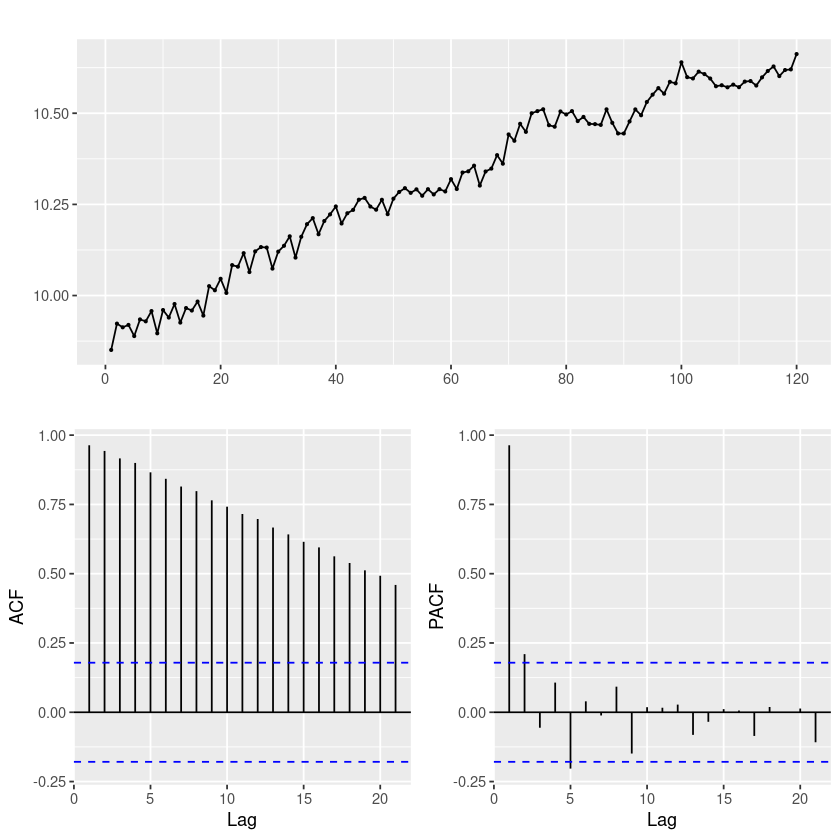

In [48]:
ggtsdisplay(x)

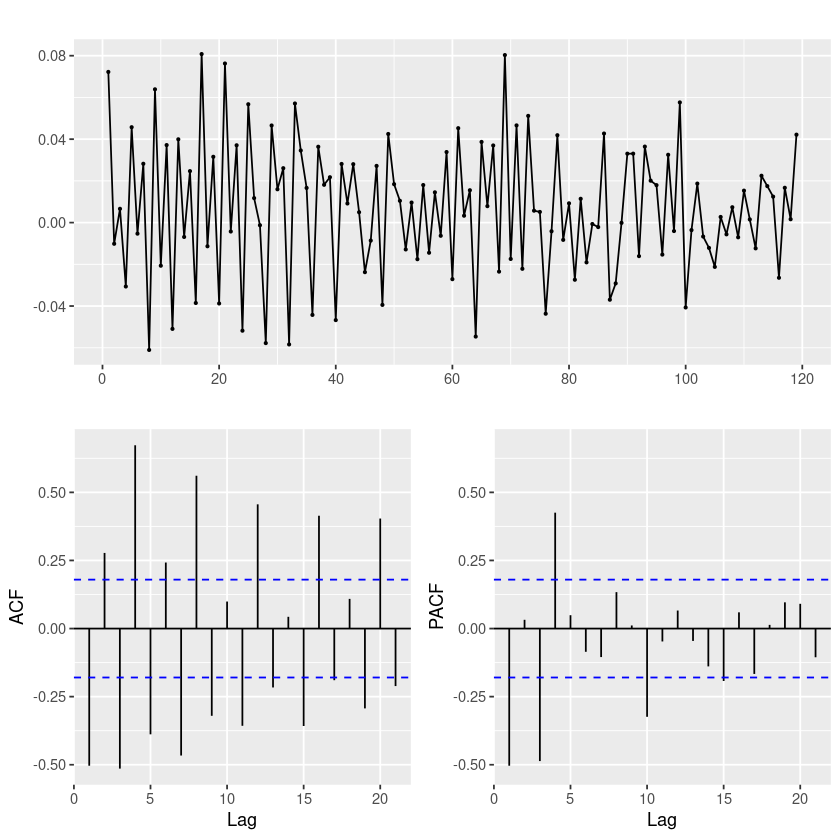

In [49]:
ggtsdisplay(diff(x))

In [53]:
adf.test(x,2)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag  ADF p.value
[1,]   0 2.31    0.99
[2,]   1 3.76    0.99
Type 2: with drift no trend 
     lag   ADF p.value
[1,]   0 -1.35   0.575
[2,]   1 -1.14   0.648
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -4.45   0.010
[2,]   1 -2.36   0.423
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


In [54]:
adf.test(x,7)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag  ADF p.value
[1,]   0 2.31    0.99
[2,]   1 3.76    0.99
[3,]   2 3.40    0.99
[4,]   3 5.61    0.99
[5,]   4 3.01    0.99
[6,]   5 2.68    0.99
[7,]   6 2.78    0.99
Type 2: with drift no trend 
     lag   ADF p.value
[1,]   0 -1.35   0.575
[2,]   1 -1.14   0.648
[3,]   2 -1.03   0.687
[4,]   3 -1.67   0.458
[5,]   4 -1.25   0.608
[6,]   5 -1.27   0.603
[7,]   6 -1.33   0.582
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -4.45   0.010
[2,]   1 -2.36   0.423
[3,]   2 -2.41   0.401
[4,]   3 -1.22   0.901
[5,]   4 -2.33   0.434
[6,]   5 -2.60   0.324
[7,]   6 -2.45   0.384
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


In [57]:
adf.test(diff(x),4)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag    ADF p.value
[1,]   0 -17.86    0.01
[2,]   1  -8.10    0.01
[3,]   2  -9.27    0.01
[4,]   3  -3.60    0.01
Type 2: with drift no trend 
     lag    ADF p.value
[1,]   0 -19.22    0.01
[2,]   1  -9.14    0.01
[3,]   2 -11.90    0.01
[4,]   3  -4.82    0.01
Type 3: with drift and trend 
     lag    ADF p.value
[1,]   0 -19.19    0.01
[2,]   1  -9.13    0.01
[3,]   2 -12.05    0.01
[4,]   3  -4.89    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


In [64]:
ur.df(x)


############################################################### 
# Augmented Dickey-Fuller Test Unit Root / Cointegration Test # 
############################################################### 

The value of the test statistic is: 3.757 


In [61]:
summary(ur.df(x, type = "none",lags=1))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.067756 -0.019040  0.003025  0.020885  0.058783 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
z.lag.1     0.0009228  0.0002456   3.757 0.000271 ***
z.diff.lag -0.5087134  0.0785668  -6.475 2.37e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02696 on 116 degrees of freedom
Multiple R-squared:  0.2934,	Adjusted R-squared:  0.2812 
F-statistic: 24.09 on 2 and 116 DF,  p-value: 1.783e-09


Value of test-statistic is: 3.757 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


In [62]:
summary(ur.df(x, type = "none",lags=12))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.04473 -0.01308 -0.00018  0.01035  0.06223 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
z.lag.1       0.0009179  0.0003275   2.803 0.006151 ** 
z.diff.lag1  -0.2704290  0.1032679  -2.619 0.010289 *  
z.diff.lag2   0.0271265  0.1065629   0.255 0.799620    
z.diff.lag3  -0.2195526  0.1007728  -2.179 0.031855 *  
z.diff.lag4   0.2893354  0.1032376   2.803 0.006156 ** 
z.diff.lag5   0.0705790  0.1065596   0.662 0.509372    
z.diff.lag6   0.0183467  0.1058158   0.173 0.862723    
z.diff.lag7  -0.1276620  0.1059874  -1.205 0.231420    
z.diff.lag8   0.0945284  0.1062847   0.889 0.376065    
z.diff.lag9  -0.0650775  0.1020272  -0.638 0.525126    
z.diff.lag10 -0.3488072  0.0994452  -3

In [73]:
summary(ur.df(x, type = "drift",lags=1))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.070283 -0.017247  0.003388  0.019758  0.059355 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.13935    0.11390   1.223    0.224    
z.lag.1     -0.01258    0.01104  -1.140    0.257    
z.diff.lag  -0.50901    0.07840  -6.493 2.23e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0269 on 115 degrees of freedom
Multiple R-squared:  0.2743,	Adjusted R-squared:  0.2617 
F-statistic: 21.74 on 2 and 115 DF,  p-value: 9.836e-09


Value of test-statistic is: -1.1396 7.8362 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


In [75]:
# tau - stat/non-stat
# phi1 - g = b_cons = 0

In [74]:
summary(ur.df(x, type = "trend",lags=1))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.06500 -0.01739  0.00081  0.01862  0.06019 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.4536970  0.6110096   2.379   0.0190 *  
z.lag.1     -0.1452808  0.0616076  -2.358   0.0201 *  
tt           0.0008898  0.0004066   2.188   0.0307 *  
z.diff.lag  -0.4408245  0.0831958  -5.299 5.76e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02647 on 114 degrees of freedom
Multiple R-squared:  0.3036,	Adjusted R-squared:  0.2852 
F-statistic: 16.56 on 3 and 114 DF,  p-value: 5.329e-09


Value of test-statistic is: -2.3582 6.9923 3.0649 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.99 -3.43 

In [ ]:
# tau - stat/non-stat
# phi2 - g = b_trend = 0
# phi3 - g = b_trend = b_cons = 0

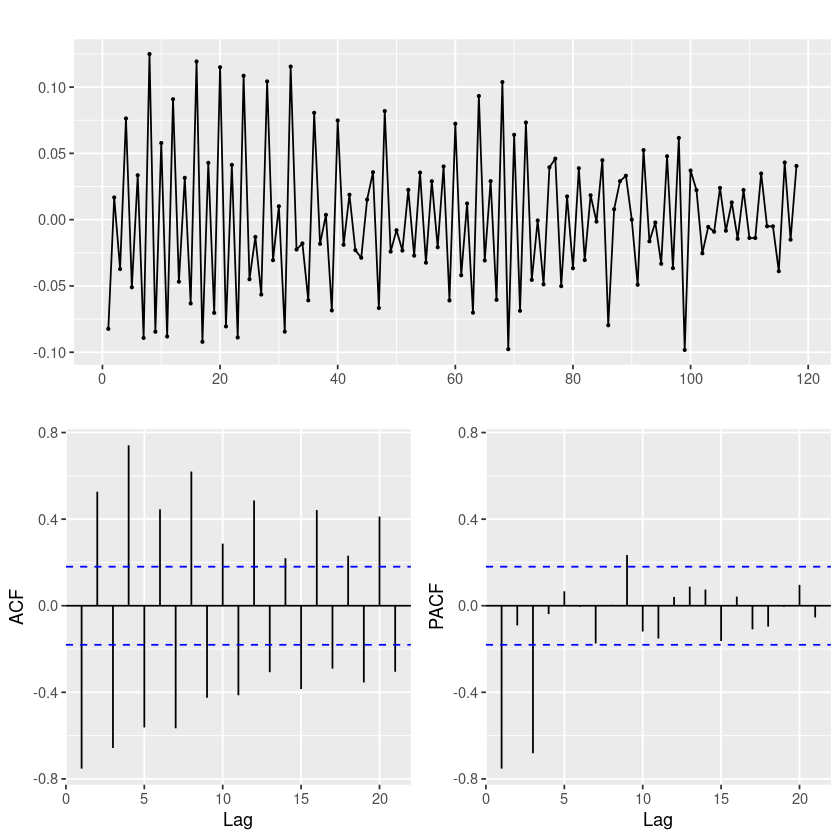

In [70]:
ggtsdisplay(diff(diff(x)))

In [71]:
summary(ur.df(diff(diff(x)), type = "trend",lags=1))


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.079379 -0.024378  0.001838  0.022945  0.073642 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.938e-04  6.720e-03  -0.059    0.953    
z.lag.1     -1.974e+00  1.745e-01 -11.310   <2e-16 ***
tt           1.228e-05  9.842e-05   0.125    0.901    
z.diff.lag   1.173e-01  9.256e-02   1.267    0.208    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03548 on 112 degrees of freedom
Multiple R-squared:  0.8841,	Adjusted R-squared:  0.881 
F-statistic: 284.7 on 3 and 112 DF,  p-value: < 2.2e-16


Value of test-statistic is: -11.3104 42.662 63.97 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -3.

In [77]:
-0.02/0.014

[1] -1.428571